# K-Nearest Neighbor with Practical Implementation

In this chapter, we will discuss the k-Nearest Neighbor Algorithm which is used for classification problems and its supervised machine learning algorithm.

This chapter spans 3 parts:

1. What is the k-Nearest Neighbors Algorithm?
2. How do k-Nearest Neighbors work?
3. Practical Implementation of k-Nearest Neighbors in Scikit Learn.

## 1. What is a K-Nearest Neighbor Algorithm?
kNN is one of the simplest classification algorithms and it is one of the most used learning algorithms. kNN falls in the supervised learning family of an algorithm. Informally this means that we are given a labelled dataset consisting of training observation (x,y) & would like to capture the relationship between x and y more informally our goal is to learn a function h: X implies to Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

kNN is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (eg distance function). kNN has been used in statistical estimation and pattern recognition already at the beginning of 1970 as a nonparametric technique.

kNN is also non-parametric and instance-based learning algorithm,

kNN is a lazy algorithm.

kNN algorithm is based on feature similarity: How closely out of sample features resemble our training set determines how we classify a given data point. 
Let’s take an example to more closely to understand kNN better.

### 1.1 Real-Life Example

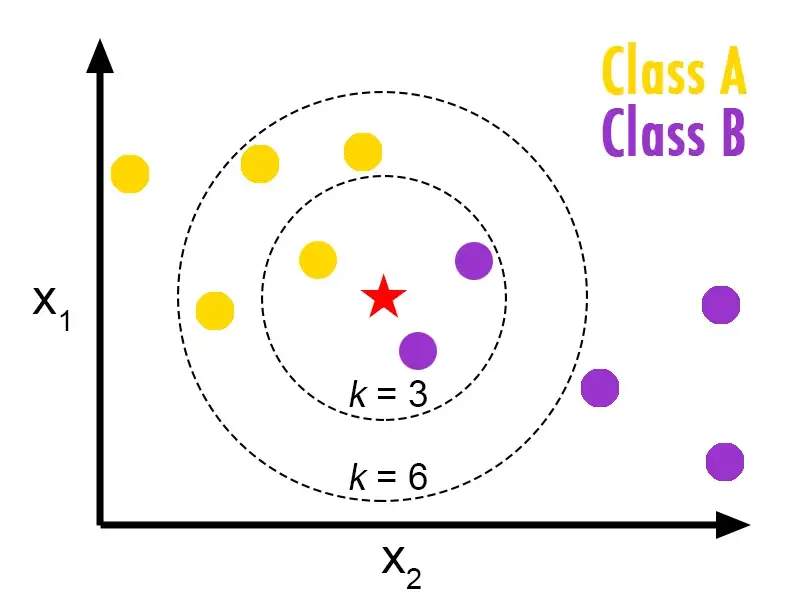

Let’s explain briefly in this example through the above figure in the above figure we have two classes. Class A belongs to the yellow family and Class B is belonged to the purple class according to the above figure. Then train dataset in kNN model which we discuss later but focus on just example here k=3 is three nearest neighbors a k=6 six nearest neighbors. so when we take k=3 then what happens and when k=6 then what happens.When k=3 then two belong to a purple class and one belongs to the yellow class majority vote of purple so here the purple class is considered similarly when k=6 then four belong to a yellow class and two belong to purple class so majority votes are yellow so consider the yellow class. So in this way kNN works.

Let’s explain briefly how kNN works

## 2. How k-Nearest Neighbor Algorithm Works?
In the classification setting, the k-Nearest neighbor algorithm essentially boils down to forming a majority vote between the k most similar instances to given ‘unseen’ observation. The similarity is defined according to a distance metric between two data points. A popular choice is a Euclidean distance Very often, especially when measuring the distance in the plane, we use the formula for the Euclidean distance. According to the Euclidean distance formula, the distance between two points in the plane with coordinates (x, y) and (a, b) is given by

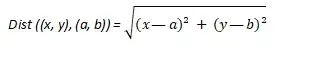

1. It runs through the whole dataset computing d between x and each training observation. We’ll call k points in the training dataset to x the set A. Note that k is usually odd to prevent a situation.
2. It then estimates the conditional probability for each class, which is the fraction of points in A with that given class label.

An alternate way of understanding kNN is by thinking about it as calculating a decision boundary (i.e boundaries for more than two classes) which is then used to classify new points.

## 3. Practical Implementation of k-Nearest Neighbors in Scikit Learn.

### Dataset Description:
This dataset is about Iris was taken from the UCI Repository. In this dataset, we have 3 attributes which have sepal length, sepal width, and species. Species have a target attribute. In target attribute, we have three species (Setosa, Virginia, and Versicolor) and our target finds the nearest species which belong from three species using the k-Nearest Neighbors.

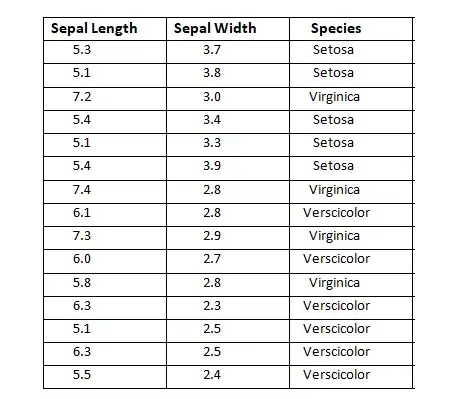

Target: New flower found, need to classify “Unlabeled”.

Feature of the new unlabeled flower:

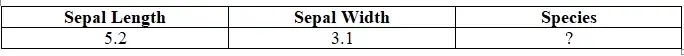

### Part 1: Data Preprocessing:
1.1 Import the Libraries

In this step, we import three Libraries in Data Preprocessing part. A library is a tool that you can use to make a specific job. First of all, we import the numpy library used for multidimensional array then import the pandas library used to import the dataset and in last we import matplotlib library used for plotting the graph.

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1.2 Import the dataset

In this step, we import the dataset to do that we use the pandas library. After import our dataset we define our Predictor and target attribute. Our Predictor attributes are a Sepal Length and Sepal width as you can see in the sample dataset which we call ‘X’ here and Species is a target attribute which we call ‘y’ here.

In [2]:
 columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 
# Load the data
df = pd.read_csv('iris.data', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Assigning the imdependent and dependent values

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

1.3 Encoding the Categorical data

In this step, we Encode our categorical data. If we see our dataset then Geography & Gender attribute is in Text and we Encode these two attributes in this part use the LabelEncoder and OneHOTEncoder from the Sklearn.processing library.

In [4]:
#Encoding the catagorical data

from sklearn.preprocessing import LabelEncoder
Labelencoder_y = LabelEncoder()
y = Labelencoder_y.fit_transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

1.4 Split the dataset for test and train

In this step, we split our dataset into a test set and train set and a 75% dataset split for training and the remaining 25% for tests.



In [5]:
#Splitting the datasets into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

1.5 Feature Scaling

Feature Scaling is the most important part of data preprocessing. If we see our dataset then some attribute contains information in Numeric value some value very high and some are very low if we see the age and estimated salary. This will cause some issues in our machinery model to solve that problem we set all values on the same scale there are two methods to solve that problem first one is Normalize and Second is Standard Scaler.

Here we use standard Scaler import from Sklearn Library.

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
print(x_train[0:5])
x_test = sc.fit_transform(X_test)
print(x_test[0:5])

[[ 0.01543995 -0.11925475  0.22512685  0.35638175]
 [-0.09984503 -1.04039491  0.11355956 -0.02864805]
 [ 1.05300481 -0.11925475  0.95031423  1.12644135]
 [-1.36797986  0.34131533 -1.39259884 -1.31208072]
 [ 1.1682898   0.11103029  0.72717965  1.38312788]]
[[ 0.12564197 -0.6117992   0.88098019  1.81979323]
 [ 0.42404164 -2.0207913   0.21386113 -0.1846167 ]
 [-0.32195754  2.67584903 -1.36296573 -1.32999381]
 [ 2.36363949 -0.37696718  1.60874643  0.9607604 ]
 [-1.06795671  0.7971929  -1.30231854 -1.32999381]]


### Part 2: Building the kNN classifier model:

In this part, we model our kNN Classifier model using Scikit Learn Library.

2.1 Import the Libraries

In this step, we are building our kNN model to do this first we import a kNN model from Scikit Learn Library.

In [7]:
#import kNN package from sklearn
from sklearn.neighbors import KNeighborsClassifier

2.2 Initialize our kNN model

After import, the model initializes our model and take 5 nearest neighbors metric = Euclidean distance with power 2. Here note Minkowski is basically Euclidean distance

In [8]:
k=5
knn = KNeighborsClassifier(n_neighbors = k)

2.3 Fitting the kNN Model

In this step, we fit the training data into our model X_train, y_train is our training data.

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Part 3: Making the Prediction and Visualizing the result:

In this Part, we make a prediction of our test set dataset and visualizing the result using the matplotlib library.

3.1 Predict the test set Result

In this step, we predict our test set result.

In [10]:
result = knn.predict(X_test)
result

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

3.2 Confusion Metric

In this step we make a confusion metric of our test set result to do that we import confusion matrix from sklearn.metrics then in confusion matrix, we pass two parameters first is y_test which is the actual test set result and second is y_pred which predicted result.

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,result)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

3.3 Accuracy Score

In this step, we calculate the accuracy score on the basis of the actual test result and predict test results.



In [12]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,result)
score*100

97.36842105263158